In [1]:
import pandas as pd
from pandas import DataFrame,Series

In [2]:
data= pd.read_csv(r"C:\Users\hp\Downloads\_births_and_deaths.csv")

In [3]:
data.head()

,Quarter,Male Live Births,Female Live Births,Male Deaths,Female Deaths
0,2000Q1,7639,7139,3346,3070
1,2000Q2,7365,6866,3372,3178
2,2000Q3,7174,6843,3675,3511
3,2000Q4,6979,6600,3357,3151
4,2001Q1,7496,7232,3231,3070


In [4]:
data[['year','quarter']]=data['Quarter'].str.split('Q',expand=True)

In [5]:
del data['Quarter']

In [6]:
data=data.reindex(['year','quarter','Male Live Births','Female Live Births','Male Deaths','Female Deaths'],axis=1)

In [7]:
data.head()

,year,quarter,Male Live Births,Female Live Births,Male Deaths,Female Deaths
0,2000,1,7639,7139,3346,3070
1,2000,2,7365,6866,3372,3178
2,2000,3,7174,6843,3675,3511
3,2000,4,6979,6600,3357,3151
4,2001,1,7496,7232,3231,3070


# growth % in male and female?(year wise)

In [8]:
filt= data['year'] == '2000'
data.loc[filt,['Male Live Births','Male Deaths']]

,Male Live Births,Male Deaths
0,7639,3346
1,7365,3372
2,7174,3675
3,6979,3357


In [9]:
grp_year= data.groupby('year')

In [10]:
data2=grp_year[['Male Live Births','Male Deaths']].sum()

In [11]:
data2['male_growthratio']= data2['Male Live Births']/data2['Male Deaths']


In [12]:
data2.head()

,Male Live Births,Male Deaths,male_growthratio
year,,,
2000,29157,13750,2.120509
2001,28333,13983,2.026246
2002,27577,14023,1.966555
2003,28820,14020,2.055635
2004,29744,14075,2.113250


In [13]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'growth%')

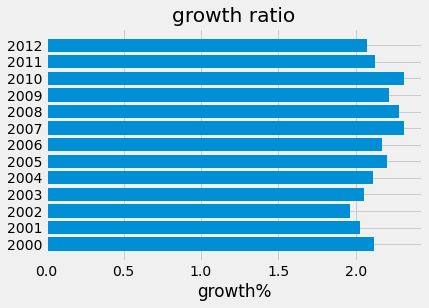

In [14]:
years=(data2.index)
num=data2['male_growthratio']
plt.style.use('fivethirtyeight')

plt.barh(years,num)

plt.title('growth ratio')

plt.xlabel('growth%')


In [15]:
data3=grp_year[['Female Live Births','Female Deaths']].sum()

In [16]:
data3['female_growthratio']= data3['Female Live Births']/data3['Female Deaths']

In [17]:
data3.head()

,Female Live Births,Female Deaths,female_growthratio
year,,,
2000,27448,12910,2.126104
2001,27466,13842,1.984251
2002,26444,14042,1.883208
2003,27314,13990,1.952395
2004,28329,14344,1.974972


Text(0.5, 0, 'growth%')

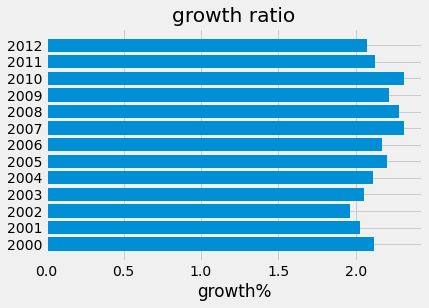

In [18]:
years=(data3.index)
nums=data3['female_growthratio']
plt.style.use('fivethirtyeight')

plt.barh(years,num)

plt.title('growth ratio')

plt.xlabel('growth%')

In [19]:
import seaborn as sns

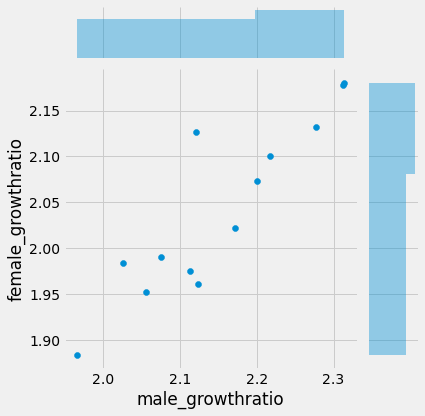

In [20]:
sns.jointplot(num,nums)

# growth % in male and female?(quarter wise)



In [21]:
data.head()

,year,quarter,Male Live Births,Female Live Births,Male Deaths,Female Deaths
0,2000,1,7639,7139,3346,3070
1,2000,2,7365,6866,3372,3178
2,2000,3,7174,6843,3675,3511
3,2000,4,6979,6600,3357,3151
4,2001,1,7496,7232,3231,3070


In [22]:
qtr_grp=data.groupby('quarter')

In [23]:
qtr_grp[['Male Live Births','Male Deaths']].sum()

,Male Live Births,Male Deaths
quarter,,
1,102195,43074
2,98740,45399
3,98928,51203
4,97404,44922


In [24]:
data4=qtr_grp[['Male Live Births','Male Deaths']].sum()
data4['male_growth']=data4['Male Live Births']/data4['Male Deaths']
data4

,Male Live Births,Male Deaths,male_growth
quarter,,,
1,102195,43074,2.372545
2,98740,45399,2.174938
3,98928,51203,1.932074
4,97404,44922,2.168292


In [26]:
data5=qtr_grp[['Female Live Births','Female Deaths']].sum()
data5['female_growth']=data5['Female Live Births']/data5['Female Deaths']
data5

,Female Live Births,Female Deaths,female_growth
quarter,,,
1,96856,42553,2.276126
2,93694,45139,2.075677
3,94510,52248,1.808873
4,92651,45013,2.058316


Text(0.5, 1.0, 'qyarter wise growth')

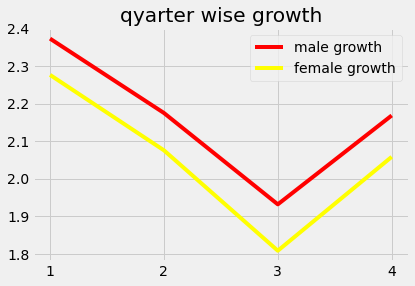

In [28]:
plt.plot(data4['male_growth'],color='red',label='male growth')
plt.plot(data5['female_growth'],color='yellow',label='female growth')

plt.legend()
plt.title('qyarter wise growth')

